<a href="https://colab.research.google.com/github/vmduarte/ANN_2021/blob/main/Trabalho_1_volume_arvores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [163]:
# para gerar o grafico no browser
%matplotlib inline

In [164]:
!git clone https://github.com/vmduarte/ANN_2021/
%cd ANN_2021

Cloning into 'ANN_2021'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021/ANN_2021


In [165]:
# leitura dos dados
df=pd.read_csv("Artigo_volume_arvores.csv")

In [166]:
df.head(3)

,Unnamed: 0,Tipo,Local,Arvores,Especie,Estatistica,Dap,Altura,Volume
0,1,1,SP,207,Eucalyptus spp,Media,9.71,9.09,38.0000
1,2,1,SP,207,Eucalyptus spp,Desvio-padrao,2.51,2.00,0.0223
2,3,1,SP,207,Eucalyptus spp,Minimo,3.00,3.40,0.0015


In [167]:
df.tail(3)

,Unnamed: 0,Tipo,Local,Arvores,Especie,Estatistica,Dap,Altura,Volume
17,18,5,MT,30,Tectona grandis,Desvio-padrao,2.87,1.9,0.0195
18,19,5,MT,30,Tectona grandis,Minimo,5.70,5.1,0.0108
19,20,5,MT,30,Tectona grandis,Maximo,15.90,12.2,0.0766


In [168]:
# separa as colunas de interesse (filtrar)
Index=[1,6,7,8]
Dat_Select=[]
Dat_Select=df.iloc[:,Index].copy()

In [169]:
Dat_Select.head(3)

,Tipo,Dap,Altura,Volume
0,1,9.71,9.09,38.0000
1,1,2.51,2.00,0.0223
2,1,3.00,3.40,0.0015


In [170]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
        #x[i]=0.8*(x[i]-min_x)/(max_x-min_x)+0.1
    return x

In [171]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [172]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [173]:
DAT.tail(3)

,Tipo,Dap,Altura,Volume
17,1.0,-0.979569,-1.000000,-0.999053
18,1.0,-0.818956,-0.859987,-0.999511
19,1.0,-0.240068,-0.549333,-0.996047


In [174]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None)
test=DAT.drop(train.index)

In [175]:
train.head(3)

,Tipo,Dap,Altura,Volume
0,-1.0,-0.591373,-0.685408,1.000000
9,0.0,-0.829739,-0.811420,-0.983773
5,-0.5,-0.774120,-0.854736,-0.986947


In [176]:
test.head(3)

,Tipo,Dap,Altura,Volume
7,-0.5,0.616913,0.448261,-0.946956
8,0.0,0.257662,0.107416,-0.970267
15,0.5,1.000000,1.000000,-0.875879


In [177]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0]]
x_test=test.iloc[:,[0]]
X_OLD=DAT_OLD.iloc[:,[0]]

In [178]:
# obtem a dependente volume (treino e teste)
Index=[3]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]

In [179]:
# define a rede neural 
model = MLPRegressor(solver='adam',activation='tanh',alpha=1e-5,max_iter=100,
                     hidden_layer_sizes=(5, 5),random_state=1)

In [180]:
# treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 5), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [181]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [182]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [183]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [184]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [185]:
train

,Volume
0,38.0000
9,0.3098
5,0.2495
16,0.0344
18,0.0108
14,0.0476
2,0.0015
6,0.0231
4,0.3413
11,1.1093


In [186]:
# escolhe uma das resposta para fazer o grafico (volume-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Volume'].copy()
resist_obs_train=train['Volume'].copy()

In [187]:
# escolhe uma das resposta para fazer o grafico (volume-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Volume'].copy()
resist_obs_test=test['Volume'].copy()

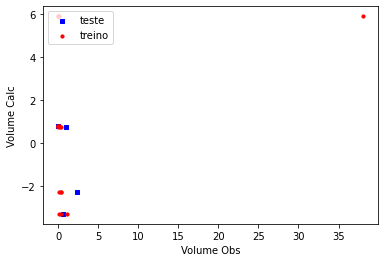

In [188]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Volume Calc')
plt.xlabel('Volume Obs')
plt.show()

In [189]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 9.218675686248153
R^2 teste= -11.300787893496198


In [190]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 74.98258952355081
R^2 treino= 0.10429849597290564
